# SPAM DETECTION PROJECT

#### The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.
#### Spam Detector is used to detect unwanted, malicious and virus infected texts and helps to separate them from the nonspam texts. It uses a binary type of classification containing the labels such as ‘ham’ (nonspam) and spam. Application of this can be seen in Google Mail (GMAIL) where it segregates the spam emails in order to prevent them from getting into the user’s inbox.
#### A collection of 5573 rows SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages.
#### A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available.

## Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import lightgbm 
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
import scikitplot as skplt

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

import joblib

## DATASET

In [9]:
df=pd.read_csv(r"C:\Users\vikas\Desktop\fliprobo\Spam Project\spam.csv", encoding='latin-1')

## top 5 rows data

In [10]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## EDA

### Total Numbers of Rows and Column

In [11]:
df.shape

(5572, 5)

### There are 5572 rows and 5 columns in the given dataset

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Column Name

In [12]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

### Data Type of All Data

In [13]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

### all data are of object datatype

## Now, checking for NULL values

In [14]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### Here, we can clearly see only there is Null values in columns:- Unnamed: 2, Unnamed: 3 and Unnamed: 4. Hence, we will drop these columns.

## droping irrelevant columns

In [36]:
df1=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [37]:
df1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## changing the columns name as target and message

In [38]:
df2=df1.rename(columns={'v1' : 'target','v2' : 'message'})
df2

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Checking for unique values and value counts 

In [39]:
df2['target'].nunique()

2

In [40]:
df2['target'].unique()

array(['ham', 'spam'], dtype=object)

In [41]:
df2['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [42]:
df2.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [43]:
df2.isnull().sum()

target     0
message    0
dtype: int64

## Now,checking for duplicate data

In [44]:
df2.duplicated().sum()

403

## dropping the duplicate data from our dataset

In [45]:
df2.drop_duplicates(inplace = True)

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5169 non-null   object
 1   message  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


## Now, all duplicates data have been removed and it has zero null values data. It contains 5169 rows and 2 columns(target and message) 

# Visualization

## 1. Countplot

ham     4516
spam     653
Name: target, dtype: int64


<AxesSubplot:xlabel='target', ylabel='count'>

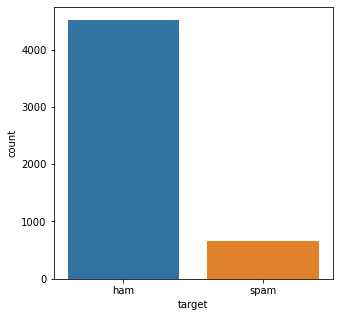

In [47]:
print(df2['target'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('target', data=df2)

### "ham" column is containing 4516 data and "spam" is containing 653 data. From this plot, we can clearly see that this dataset has highly imbalanced, we will try to correct it later in the model

## 2. Pie-Plot

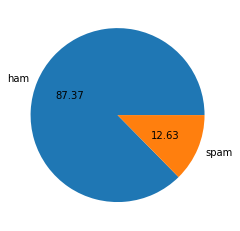

In [51]:
plt.pie(df2['target'].value_counts(), labels =['ham', 'spam'], autopct= "%.02f")
plt.show()

### This plot is also showing that this dataset is containing imbalanced data.

### creating coloumn which will contain the numbers of characters

In [52]:
df2['length'] = df2['message'].str.len()
df2.head()

,target,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### creating coloumn which will fetch numbers of words

In [54]:
df2['num_words'] = df2['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df2.head()

,target,message,length,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


### creating coloumn which will fetch numbers of sentences

In [55]:
df2['num_sent'] = df2['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df2.head()

,target,message,length,num_words,num_sent
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


## now converting "target" data into binary data i.e., ham for 0 and spam for 1

In [56]:
df2['target'] = df2.target.map({'ham':0, 'spam':1})

In [57]:
df2.head()

,target,message,length,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [58]:
df3=df2.copy()

In [59]:
df3[['length','num_words','num_sent']].describe()

,length,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [60]:
comment_len = df3.message.str.len()
df3.message.str.len().median()

60.0

## 3.Histplot

<AxesSubplot:xlabel='length', ylabel='Count'>

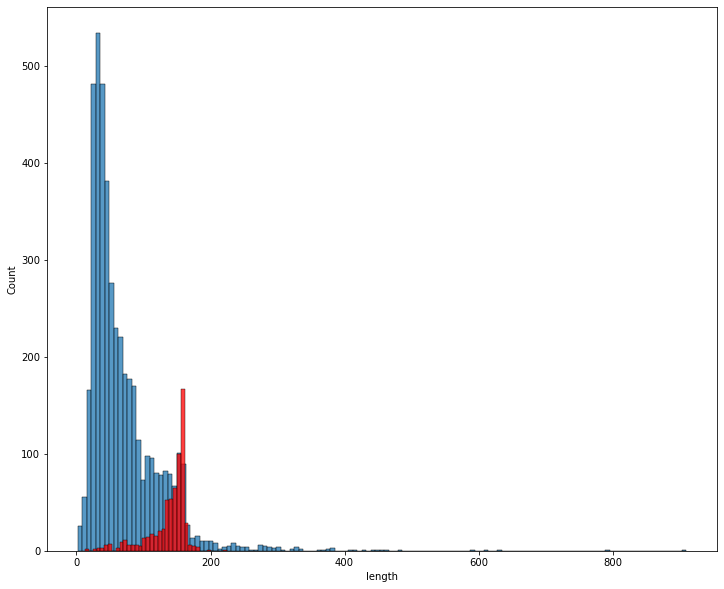

In [64]:
plt.figure(figsize=(12,10))
sns.histplot(df3[df3['target']==0]['length'])
sns.histplot(df3[df3['target']==1]['length'],color = 'red')

## 4. Distplot

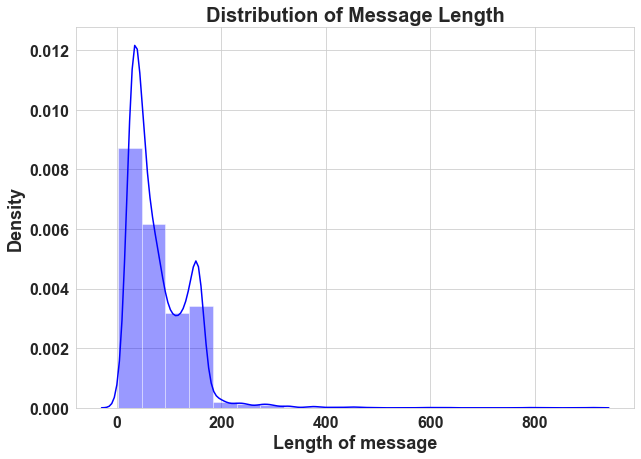

In [66]:
#Distribution of message length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = df3.message.str.len()
sns.distplot(comment_len, bins=20, color = 'blue')

plt.title("Distribution of Message Length", fontsize=20, fontweight='bold')
plt.ylabel('Density', fontsize=18,fontweight='bold')
plt.xlabel('Length of message', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

## 5.pairplot

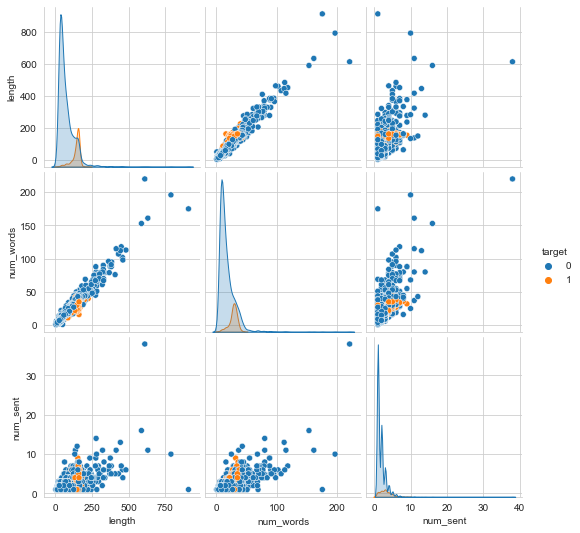

In [67]:
sns.pairplot(df3, hue = 'target')

In [68]:
#Checking correlation of the dataset
corr=df3.corr()  
corr

,target,length,num_words,num_sent
target,1.000000,0.384717,0.262969,0.267602
length,0.384717,1.000000,0.965784,0.626118
num_words,0.262969,0.965784,1.000000,0.680882
num_sent,0.267602,0.626118,0.680882,1.000000


## 6. Heatmap

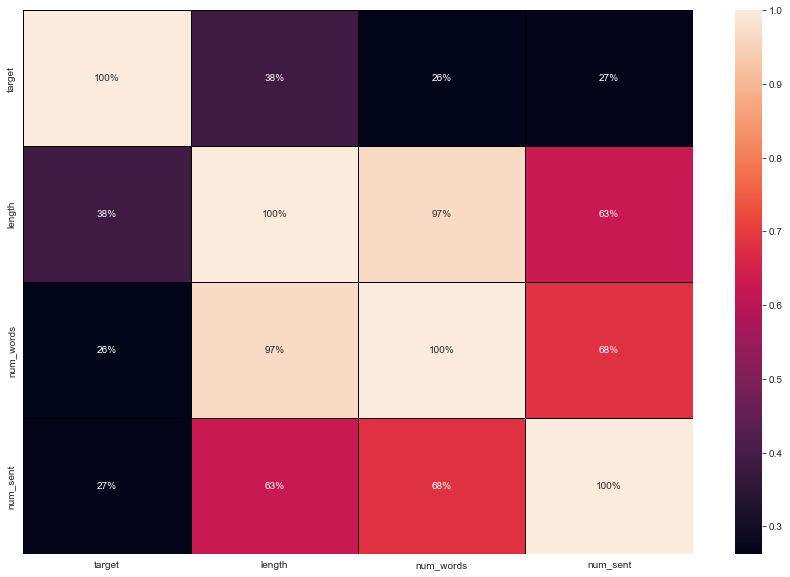

In [69]:
# Plotting heatmap for visualizing the correlation
plt.figure(figsize=(15, 10))
corr = df3.corr() 
sns.heatmap(corr, linewidth=0.5, linecolor='black', fmt='.0%', annot=True)
plt.show()

In [70]:
## checking skewness
df3.skew()

target       2.250180
length       2.610100
num_words    3.309687
num_sent     4.945423
dtype: float64

In [71]:
df4=df3.rename(columns={'length' : 'length_before_cleaning'})
df4

,target,message,length_before_cleaning,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


# Data pre-processing

In [76]:
# Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [78]:
#Replacing '\n' in message
df4['message'] = df4['message'].replace('\n',' ')

In [79]:
#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [80]:
df4["clean_comments"] = df4['message'].apply(clean_comments)

In [81]:
df4

,target,message,length_before_cleaning,num_words,num_sent,clean_comments
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,nd time tried contact u u å pound prize claim ...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,ì b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood suggestion
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitching acted like interested buying some...


In [83]:
df4['length_after_cleaning'] = df4['clean_comments'].map(lambda clean_comments: len(clean_comments))
df4.head()

,target,message,length_before_cleaning,num_words,num_sent,clean_comments,length_after_cleaning
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...,82
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,23
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win fa cup final tkts st ...,101
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say,35
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though,35


In [84]:
print("Original Length:", df4.length_before_cleaning.sum())
print("Cleaned Length:", df4.length_after_cleaning.sum())
print("Total Words Removed:", (df4.length_before_cleaning.sum()) - (df4.length_after_cleaning.sum()))

Original Length: 408237
Cleaned Length: 249465
Total Words Removed: 158772


In [85]:
df4.shape

(5169, 7)

# Wordcloud

In [86]:
wc = WordCloud(width = 500, height = 300, min_font_size= 10, background_color= 'black')

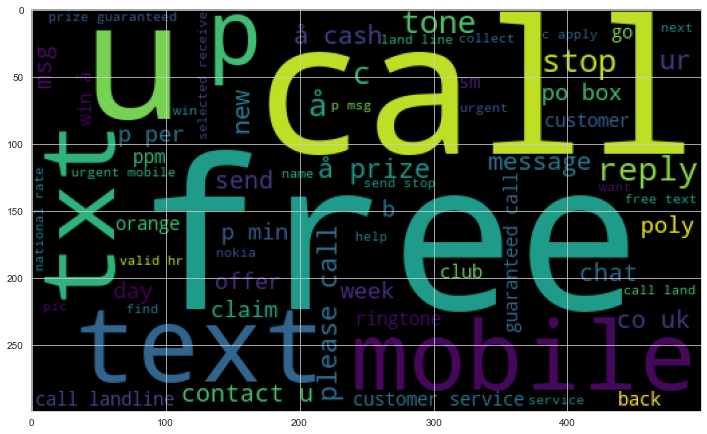

In [88]:
#Generating Word Cloud for Spam Messages
spam_wordcloud = wc.generate(df4[df4['target']==1]['clean_comments'].str.cat(sep = " "))
plt.figure(figsize=(12,8))
plt.imshow(spam_wordcloud)
plt.show()

## In the above Word Cloud, we can clearly see the words like text, free, reply, call, claim..etc. these words are generally seen in the SPAM Msgs.

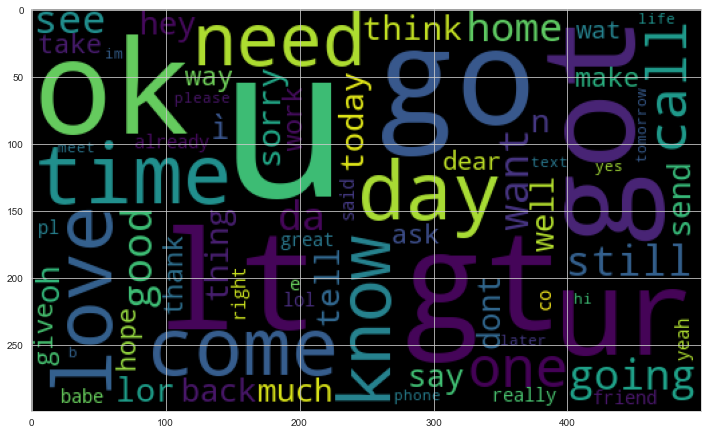

In [89]:
#Generating Word Cloud for Ham Messages
ham_wordcloud = wc.generate(df4[df4['target']==0]['clean_comments'].str.cat(sep = " "))
plt.figure(figsize=(12,8))
plt.imshow(ham_wordcloud)
plt.show()

## In the above Word Cloud, we can clearly see the words like love, come, go, call, time..etc. these words are generally seen in the Ham Msgs.

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [98]:
#Convert text into vectors using TF-IDF
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df4['message'])
x = features
y=df4['target']

In [99]:
df4.shape

(5169, 7)

# Creating Model

In [102]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=20)

In [104]:
x.shape, y.shape

((5169, 8404), (5169,))

In [105]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((3618, 8404), (3618,), (1551, 8404), (1551,))

# 1. Logistic Regression

In [106]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))


accuracy_score:  0.9406834300451322
confusion_matrix: 
 [[1347    1]
 [  91  112]]
classification_report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1348
           1       0.99      0.55      0.71       203

    accuracy                           0.94      1551
   macro avg       0.96      0.78      0.84      1551
weighted avg       0.94      0.94      0.93      1551



## Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Logistic regressor prediction Confusion_matrix')

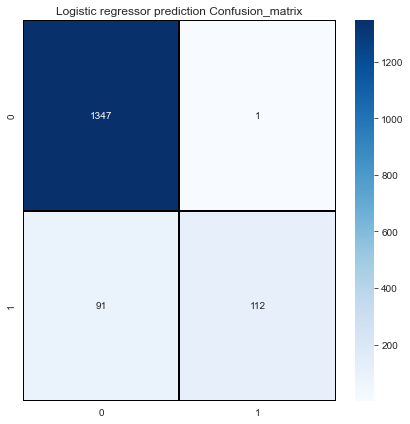

In [108]:
cm = confusion_matrix(y_test,pred_lr)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("Logistic regressor prediction Confusion_matrix")

## Cross Validation Score for Logistic Regression

In [109]:
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

CV score for Logistic Regression:  0.9450568380765493


# 2.LinearSVC

In [110]:
svc = LinearSVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_svc))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_svc))
print("classification_report: \n", classification_report(y_test,pred_svc))


accuracy_score:  0.9722759509993553
confusion_matrix: 
 [[1343    5]
 [  38  165]]
classification_report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1348
           1       0.97      0.81      0.88       203

    accuracy                           0.97      1551
   macro avg       0.97      0.90      0.93      1551
weighted avg       0.97      0.97      0.97      1551



## Confusion Matrix for LinearSVC

Text(0.5, 1.0, 'LinearSVC prediction Confusion_matrix')

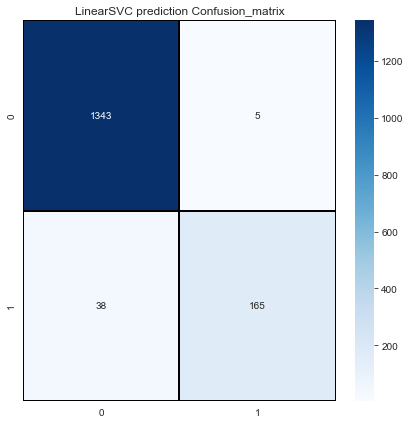

In [111]:
cm = confusion_matrix(y_test,pred_svc)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("LinearSVC prediction Confusion_matrix")

## Cross Validation Score for LinearSVC

In [112]:
print('CV score for LinearSVC: ',cross_val_score(svc,x,y,cv=5).mean())

CV score for LinearSVC:  0.9750429258081006


## 3.BernoulliNB

In [113]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
pred_bnb=bnb.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_bnb))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_bnb))
print("classification_report: \n", classification_report(y_test,pred_bnb))


accuracy_score:  0.970341715022566
confusion_matrix: 
 [[1344    4]
 [  42  161]]
classification_report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1348
           1       0.98      0.79      0.88       203

    accuracy                           0.97      1551
   macro avg       0.97      0.90      0.93      1551
weighted avg       0.97      0.97      0.97      1551



## Confusion Matrix for BernoulliNB

Text(0.5, 1.0, 'BernoulliNB prediction Confusion_matrix')

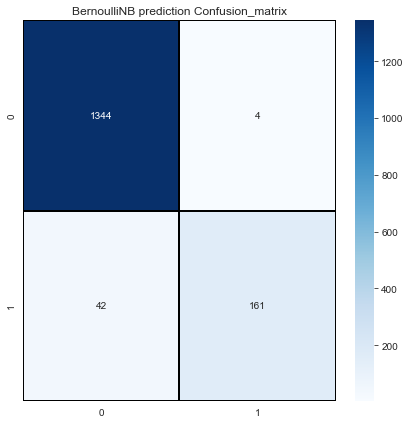

In [114]:
cm = confusion_matrix(y_test,pred_bnb)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("BernoulliNB prediction Confusion_matrix")

## Cross Validation Score for BernoulliNB

In [115]:
print('CV score for BernoulliNB: ',cross_val_score(bnb,x,y,cv=5).mean())

CV score for BernoulliNB:  0.9725289807718595


# 4.MultinomialNB

In [116]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
pred_mnb=mnb.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_mnb))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_mnb))
print("classification_report: \n", classification_report(y_test,pred_mnb))

accuracy_score:  0.9613152804642167
confusion_matrix: 
 [[1348    0]
 [  60  143]]
classification_report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1348
           1       1.00      0.70      0.83       203

    accuracy                           0.96      1551
   macro avg       0.98      0.85      0.90      1551
weighted avg       0.96      0.96      0.96      1551



## Confusion Matrix for MultinomialNB

Text(0.5, 1.0, 'MultinomialNB prediction Confusion_matrix')

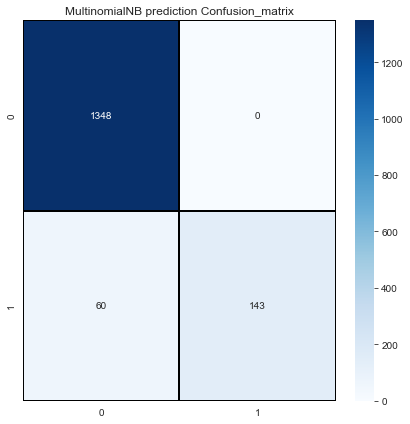

In [117]:
cm = confusion_matrix(y_test,pred_mnb)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("MultinomialNB prediction Confusion_matrix")

## cross validation score for MultinomialNB

In [118]:
print('CV score for MultinomialNB: ',cross_val_score(mnb,x,y,cv=5).mean())

CV score for MultinomialNB:  0.9630482285731405


## 5. XGBClassifier

In [119]:
xgb = XGBClassifier(verbosity=0)
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_xgb))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_xgb))
print("classification_report: \n", classification_report(y_test,pred_xgb))

accuracy_score:  0.973565441650548
confusion_matrix: 
 [[1342    6]
 [  35  168]]
classification_report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1348
           1       0.97      0.83      0.89       203

    accuracy                           0.97      1551
   macro avg       0.97      0.91      0.94      1551
weighted avg       0.97      0.97      0.97      1551



## Confusion Matrix for XGBClassifier

Text(0.5, 1.0, 'XGBClassifier prediction Confusion_matrix')

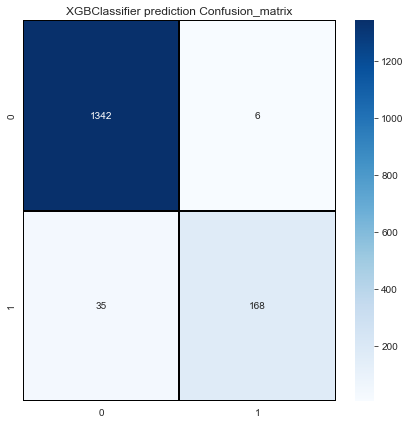

In [120]:
cm = confusion_matrix(y_test,pred_xgb)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("XGBClassifier prediction Confusion_matrix")

## cross validation score for XGBClassifier

In [121]:
print('CV score for XGBClassifier: ',cross_val_score(xgb,x,y,cv=5).mean())

CV score for XGBClassifier:  0.9725286062828029


## 6.SGDClassifier

In [122]:
sgd= SGDClassifier()
sgd.fit(x_train,y_train)
pred_sgd=sgd.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_sgd))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_sgd))
print("classification_report: \n", classification_report(y_test,pred_sgd))

accuracy_score:  0.97678916827853
confusion_matrix: 
 [[1343    5]
 [  31  172]]
classification_report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1348
           1       0.97      0.85      0.91       203

    accuracy                           0.98      1551
   macro avg       0.97      0.92      0.95      1551
weighted avg       0.98      0.98      0.98      1551



## Confusion Matrix for SGDClassifier

Text(0.5, 1.0, 'SGDClassifier prediction Confusion_matrix')

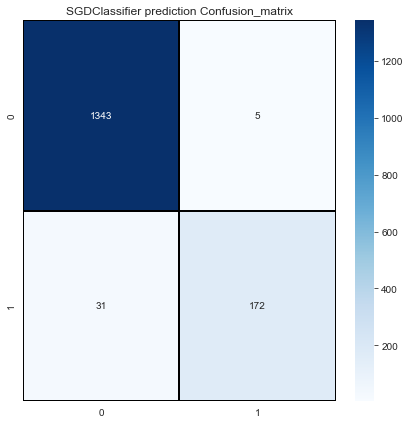

In [148]:
cm = confusion_matrix(y_test,pred_sgd)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("SGDClassifier prediction Confusion_matrix")

## cross validation score for SGDClassifier

In [124]:
print('CV score for SGDClassifier: ',cross_val_score(sgd,x,y,cv=5).mean())

CV score for SGDClassifier:  0.9779446542623408


## ROC & AUC Curve for all model

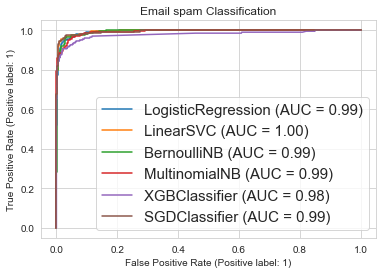

In [149]:
#Lets plot roc curve and check auc and performance of all algorithms
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score,classification_report, confusion_matrix, plot_roc_curve
disp = plot_roc_curve(lr, x_test, y_test)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(bnb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(mnb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(sgd, x_test, y_test, ax = disp.ax_)
plt.title("Email spam Classification")
plt.legend(prop={"size" :15} ,loc = 'lower right')
plt.show()


## Out of all model linearsvc is the best model and we will tune this model using Gridsearchcv.

# HyperParameter Tuning
## Linear SVC with GridSearchCV

In [125]:
grid_params =  {'C':(0.001, 0.01, 0.1, 1, 10),
                   'penalty':('l1','l2'),
                  'loss':('hinge','squared_hinge')}

# Train the model with given parameters using GridSearchCV
LSVC =  GridSearchCV(svc, grid_params, cv=5)
LSVC.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': (0.001, 0.01, 0.1, 1, 10),
                         'loss': ('hinge', 'squared_hinge'),
                         'penalty': ('l1', 'l2')})

In [126]:
# Selecting the best parameters found by GridSearchCV
print(LSVC.best_params_)
print(LSVC.best_score_)

{'C': 10, 'loss': 'squared_hinge', 'penalty': 'l2'}
0.9762289570008329


## Best model

In [127]:
best_model = LinearSVC(C= 1, loss= 'squared_hinge', penalty= 'l2')
best_model.fit(x_train,y_train) 
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
print("ACCURACY SCORE:", accuracy)
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

ACCURACY SCORE: 97.22759509993553

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1348
           1       0.97      0.81      0.88       203

    accuracy                           0.97      1551
   macro avg       0.97      0.90      0.93      1551
weighted avg       0.97      0.97      0.97      1551


CONFUSION MATRIX: 
 [[1343    5]
 [  38  165]]


## CONFUSION MATRIX

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

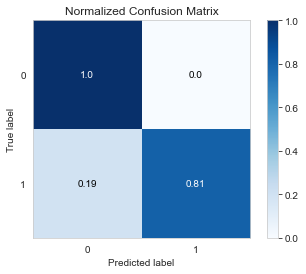

In [128]:
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)

# So the best accuracy score is 97.2.

## ROC-AUC Curve

In [136]:
fpr, tpr, threshold = roc_curve(y_test,pred)
auc = roc_auc_score(y_test,pred)

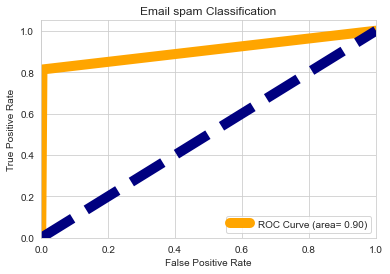

In [137]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label="ROC Curve (area= %0.2f)" % auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Email spam Classification")
plt.legend(loc="lower right")
plt.show()

## Saving the Model

In [143]:
joblib.dump(best_model, "Email_Spam_Detection_Classifier.pkl")

['Email_Spam_Detection_Classifier.pkl']

## Checking predicted and original values

In [145]:
Model = joblib.load("Email_Spam_Detection_Classifier.pkl")
# Predicting test data using loaded model
prediction = Model.predict(x_test)
# Analysing Predicted vs Actual results
Email_Spam_Detection_Classifier = pd.DataFrame()
Email_Spam_Detection_Classifier['Predicted Spam Messages Detection'] = prediction
Email_Spam_Detection_Classifier['Actual Spam Messages Detection'] = y
Email_Spam_Detection_Classifier


,Predicted Spam Messages Detection,Actual Spam Messages Detection
0,0,0.0
1,0,0.0
2,1,1.0
3,0,0.0
4,0,0.0
...,...,...
1546,0,0.0
1547,0,0.0
1548,1,0.0
1549,0,0.0


In [146]:
# Converting the dataframe into CSV format and saving it
Email_Spam_Detection_Classifier.to_csv('Email_Spam_Detection_Classifier.csv', index=False)